In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [53]:
type(mnist)

sklearn.utils._bunch.Bunch

In [54]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [55]:
y.shape

(70000,)

label of the image below:   5


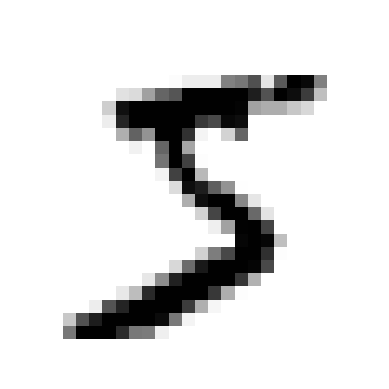

In [56]:
import matplotlib as mpl

some_digit = X.iloc[0]
some_digital_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digital_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
print(f"label of the image below:   {y[0]}")
plt.show()

In [57]:
y = y.astype(np.uint8)

In [58]:
X_train, X_valid, y_train, y_valid = X[:60000], X[60000:], y[:60000], y[60000:]

In [59]:
y_train_5 = (y_train == 5) # True: all 5s, False for not 5 digit
y_valid_5 = (y_valid == 5)

In [60]:
from sklearn.linear_model import SGDClassifier

sgd_cls = SGDClassifier(random_state=42)
sgd_cls.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [61]:
sgd_cls.predict([some_digit])

c:\Users\CLIENT\Desktop\projects\Machine-Learning-Projects\MNIST\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [62]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_cls, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [63]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [64]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [68]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_cls, X_train, y_train_5, cv=3)

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5 ,y_train_pred) # Two frequency Graph

array([[53892,   687],
       [ 1891,  3530]])

In [70]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [71]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

np.float64(0.8370879772350012)

In [72]:
recall_score(y_train_5, y_train_pred)

np.float64(0.6511713705958311)

In [73]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

np.float64(0.7325171197343847)

In [75]:
y_scores = sgd_cls.decision_function([some_digit])
y_scores

c:\Users\CLIENT\Desktop\projects\Machine-Learning-Projects\MNIST\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [77]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [78]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [80]:
y_scores = cross_val_predict(sgd_cls, X_train, y_train_5, cv=3,method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [81]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

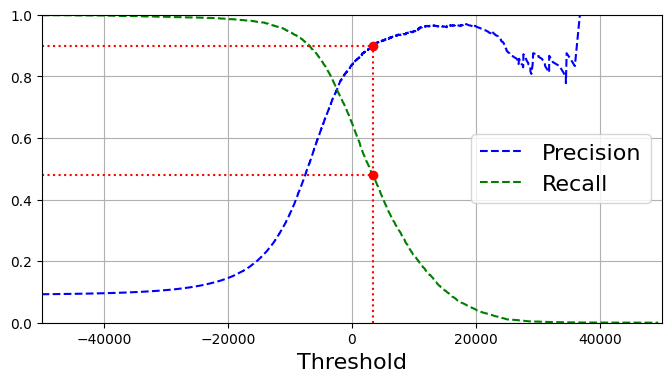

In [83]:
def plot_precision_recall_vs_threshold(precisions, recalls, threshold):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g--', label="Recall")
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])            

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))                                                                 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                               
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")  
plt.show()

In [84]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

In [85]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [86]:
precision_score(y_train_5, y_train_pred_90)

np.float64(0.9000345901072293)

In [87]:
recall_score(y_train_5, y_train_pred_90)

np.float64(0.4799852425751706)

In [88]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

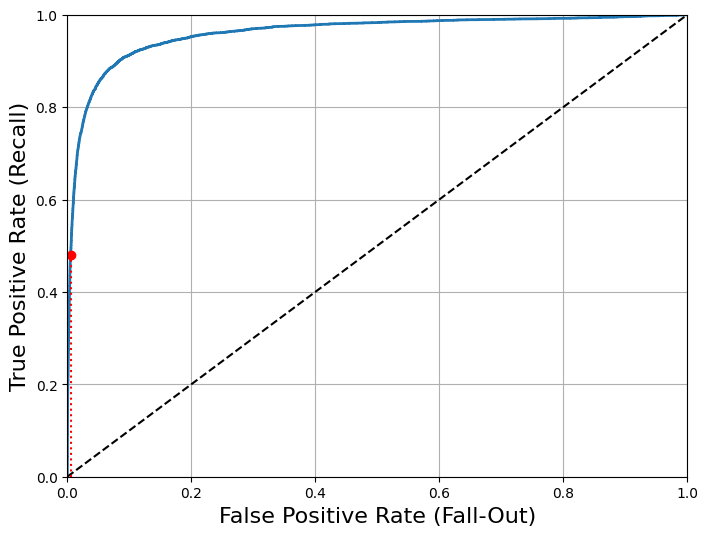

In [98]:
def plot_roc_curve(fpr, tpr, label=None):
   plt.plot(fpr, tpr, linewidth=2, label=label)
   plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
   plt.axis([0, 1, 0, 1])                                    
   plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
   plt.ylabel('True Positive Rate (Recall)', fontsize=16)
   plt.grid(True)    


plt.figure(figsize=(8, 6)) 
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]    
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")  # The dotted line represents the ROC curve of a purely random classifier
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
plt.plot([fpr_90], [recall_90_precision], "ro")             
plt.show()

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [100]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [101]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

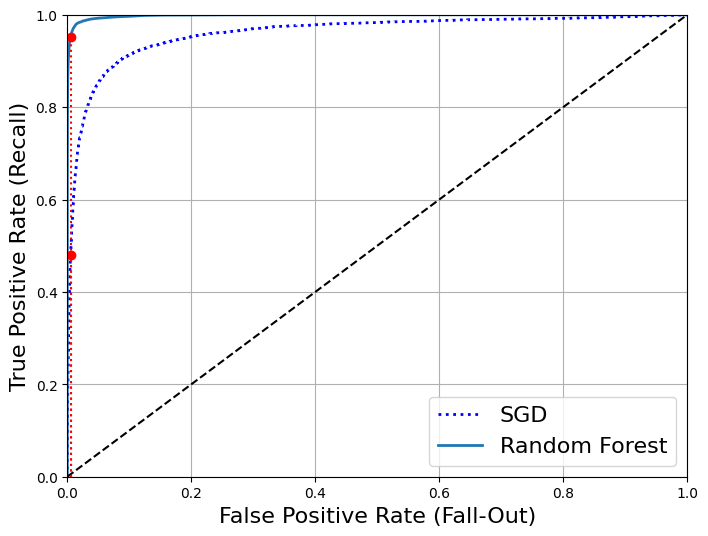

In [103]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [104]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)